**1. Прочитайте базу "COVID_19_data"** и сделайте модель для сглаженой формы(экспоненциально) по приросту(первые разности) ил по прямому ряду для выздоровлений(или заболеваний) с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
**на уроке дано задание - сделать побольше признаков и построить по ним модель**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

func

In [2]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [3]:
def smoothing(series, h):
    res = series[:h]
    res = res.append(series.rolling(window=h).mean()[h:])
    return res

In [4]:
def f_differ(series):
    fod = [0]
    fod[1:] = series[1:].values - series[:-1].values 
    return fod

In [5]:
covid = pd.read_csv('D:/AI/Machine learning/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [6]:
covid.tail(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15766,15767,04/16/2020,Yukon,Canada,2020-04-16 23:38:19,8.0,0.0,0.0
15767,15768,04/16/2020,Yunnan,Mainland China,2020-04-16 23:38:19,184.0,2.0,176.0
15768,15769,04/16/2020,Zhejiang,Mainland China,2020-04-16 23:38:19,1268.0,1.0,1244.0


Making a dataframe copy and working with it only
Выносим дату отдельным столбцом

In [7]:
covid_19 = covid.copy()
covid_19['Date']= pd.to_datetime(covid['ObservationDate']).dt.date

In [8]:
#checking date repeats; finding number of dates
if len(covid_19['Date'].value_counts())==covid_19['Date'].nunique():
    print(covid_19['Date'].nunique())

86


In [9]:
covid_by_date = covid_19.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum()

In [10]:
covid_by_date.index = pd.to_datetime(covid_by_date.index)

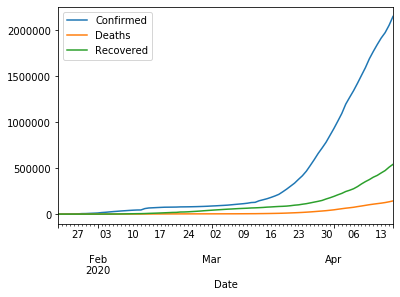

In [11]:
covid_by_date.plot()

In [12]:
covid_by_date.head(3)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0


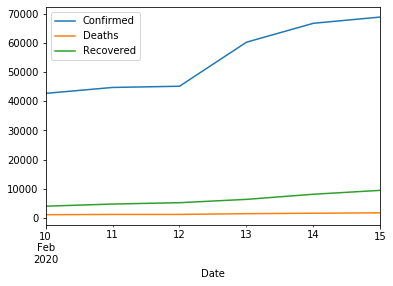

In [13]:
covid_by_date['2020-02-10': '2020-02-15'].plot()

recovered - smooth line  
**trying logarithm 'Recovered'**

In [14]:
covid_log = pd.Series(np.log(covid_by_date['Recovered']))

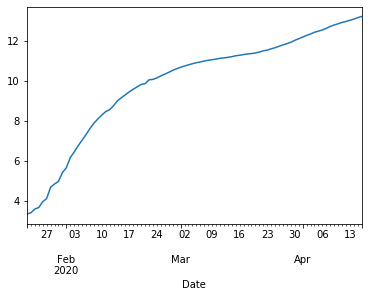

In [15]:
covid_log.plot()

In [16]:
#adding a column
covid_by_date['Logarithm'] = pd.Series(np.log(covid_by_date['Recovered']))

In [17]:
covid_by_date = covid_by_date.loc[covid_by_date.index > pd.to_datetime('2020-02-13'), :]

добавляем простое сглаживание с разными окнами, хотя при таком прогрессивном постоянном росте вряд ли это даст что-то

In [18]:
#covid_by_date['smoothing_win2'] = smoothing(covid_by_date['Recovered'], 2)
covid_by_date['smoothing_win5'] = smoothing(covid_by_date['Recovered'], 5)
#covid_by_date['smoothing_win9'] = smoothing(covid_by_date['Recovered'], 9)

C:\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Сделаем первые разности

In [19]:
covid_by_date['first_ord_differ'] = f_differ(covid_by_date['Recovered'])

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([737470., 737477., 737485., 737492., 737499., 737506., 737516.,
        737523., 737530.]), <a list of 9 Text xticklabel objects>)

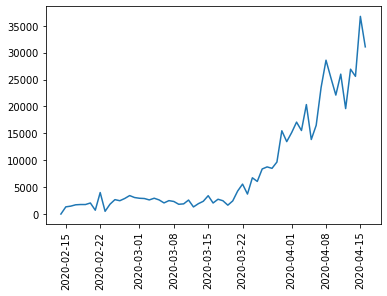

In [20]:
plt.plot(covid_by_date.loc[:, ['first_ord_differ']])
plt.xticks(rotation=90)

In [21]:
covid_by_date.tail(3)

,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ
Date,,,,,,
2020-04-14,1976192.0,125984.0,474261.0,13.069513,424568.8,25606.0
2020-04-15,2056055.0,134177.0,511019.0,13.144162,451553.4,36758.0
2020-04-16,2152647.0,143801.0,542107.0,13.203219,479552.8,31088.0


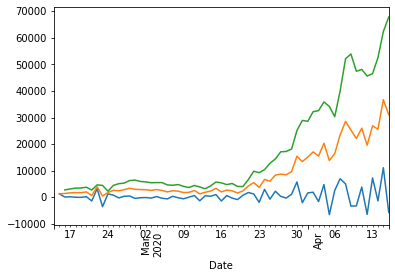

In [22]:
# compairing first order derivative with first-order differences
covid_by_date['first_ord_differ'].diff(1).plot()
covid_by_date['Recovered'].diff(1).plot()
covid_by_date['Recovered'].diff(2).plot()
plt.xticks(rotation=90)

plt.show()

In [23]:
covid_by_date['Deriv_1'] = 0
#covid_by_date['Deriv_2'] = 0
covid_by_date.loc[1:, 'Deriv_1'] = covid_by_date['Recovered'].diff(1)
#covid_by_date.loc[2:, 'Deriv_2'] = covid_by_date['Recovered'].diff(2)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**exponential_smoothing**

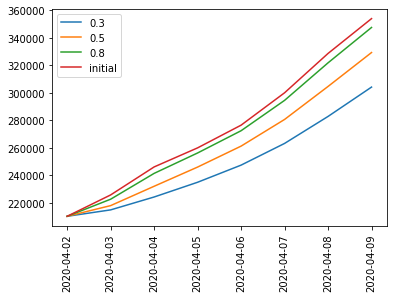

In [24]:
a = covid_by_date.loc[((covid_by_date.index > pd.to_datetime('2020-04-01')) 
                       & (covid_by_date.index < pd.to_datetime('2020-04-10'))), 'Recovered']
plt.plot(a.index, exponential_smoothing(covid_by_date.loc[(covid_by_date.index > pd.to_datetime('2020-04-01')) 
                                                          & (covid_by_date.index < pd.to_datetime('2020-04-10')), 'Recovered'],
                                        0.3), label='0.3')
plt.plot(a.index, exponential_smoothing(covid_by_date.loc[(covid_by_date.index > pd.to_datetime('2020-04-01')) 
                                                          & (covid_by_date.index < pd.to_datetime('2020-04-10')), 'Recovered'],
                                        0.5), label='0.5')
plt.plot(a.index, exponential_smoothing(covid_by_date.loc[(covid_by_date.index > pd.to_datetime('2020-04-01')) 
                                                          & (covid_by_date.index < pd.to_datetime('2020-04-10')), 'Recovered'],
                                        0.8), label='0.8')
plt.plot(a, label='initial')
plt.xticks(rotation=90)
plt.legend()

In [25]:
covid_by_date['exp_smoothing_05'] = exponential_smoothing(covid_by_date.loc[:, 'Recovered'],0.5)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
covid_by_date['exponent_initial_difference'] =  covid_by_date['Recovered'].values - covid_by_date['exp_smoothing_05'].values

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
covid_by_date.head(3)

,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ,Deriv_1,exp_smoothing_05,exponent_initial_difference
Date,,,,,,,,,
2020-02-14,66887.0,1523.0,8058.0,8.994421,8058.0,0.0,0.0,8058.00,0.00
2020-02-15,69032.0,1666.0,9395.0,9.147933,9395.0,1337.0,1337.0,8726.50,668.50
2020-02-16,71226.0,1770.0,10865.0,9.293302,10865.0,1470.0,1470.0,9795.75,1069.25


In [28]:
covid_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2020-02-14 to 2020-04-16
Data columns (total 9 columns):
Confirmed                      63 non-null float64
Deaths                         63 non-null float64
Recovered                      63 non-null float64
Logarithm                      63 non-null float64
smoothing_win5                 63 non-null float64
first_ord_differ               63 non-null float64
Deriv_1                        63 non-null float64
exp_smoothing_05               63 non-null float64
exponent_initial_difference    63 non-null float64
dtypes: float64(9)
memory usage: 7.4 KB


*prediction horizon = 1, history depth = 3*

In [29]:
p= 1
h= 3

**creating history dataframe**

In [30]:
covid_history = pd.concat([covid_by_date.loc[:, 'Recovered'] ,covid_by_date.shift(periods=1), covid_by_date.shift(periods=2),
                             covid_by_date.shift(periods=3),covid_by_date.shift(periods=4)], axis=1)
covid_history = covid_history.fillna(0)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [32]:
# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index <= split_date].copy(), data.loc[data.index >  split_date].copy()


In [33]:
#target => target column before making history dataframe = +1 to the first set of columns of history dataframe
y = covid_history.iloc[:,0]

In [34]:
# features => history dataframe (-1, -2, -3 to predicted)
#x = covid_history.iloc[h+p:, :]

In [35]:
y_tr, y_te = split_data_b(y, '2020-03-15')

In [36]:
y_train = y_tr.iloc[p:]
y_test = y_te.iloc[p:]

In [37]:
x_tr, x_te = split_data_b(covid_history, '2020-03-15')

In [38]:
x_train_history = x_tr.iloc[:-p,:]
x_test_history = x_te.iloc[:-p,:]

In [39]:
y_train.head(3)

Date
2020-02-15     9395.0
2020-02-16    10865.0
2020-02-17    12583.0
Name: Recovered, dtype: float64

In [40]:
y_test.head(3)

Date
2020-03-17    80840.0
2020-03-18    83313.0
2020-03-19    84962.0
Name: Recovered, dtype: float64

In [41]:
x_train_history.head(5)

,Recovered,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ,Deriv_1,exp_smoothing_05,exponent_initial_difference,...,exponent_initial_difference,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ,Deriv_1,exp_smoothing_05,exponent_initial_difference
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-14,8058.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-02-15,9395.0,66887.0,1523.0,8058.0,8.994421,8058.0,0.0,0.0,8058.000,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-02-16,10865.0,69032.0,1666.0,9395.0,9.147933,9395.0,1337.0,1337.0,8726.500,668.500,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-02-17,12583.0,71226.0,1770.0,10865.0,9.293302,10865.0,1470.0,1470.0,9795.750,1069.250,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2020-02-18,14352.0,73260.0,1868.0,12583.0,9.440102,12583.0,1718.0,1718.0,11189.375,1393.625,...,668.5,66887.0,1523.0,8058.0,8.994421,8058.0,0.0,0.0,8058.0,0.0


In [42]:
x_test_history.head(3)

,Recovered,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ,Deriv_1,exp_smoothing_05,exponent_initial_difference,...,exponent_initial_difference,Confirmed,Deaths,Recovered,Logarithm,smoothing_win5,first_ord_differ,Deriv_1,exp_smoothing_05,exponent_initial_difference
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-16,78088.0,167447.0,6440.0,76034.0,11.238936,70847.2,3410.0,3410.0,73268.641434,2765.358566,...,1868.434266,128343.0,4720.0,68324.0,11.132016,64587.6,1321.0,1321.0,66514.131468,1809.868532
2020-03-17,80840.0,181546.0,7126.0,78088.0,11.265592,73064.2,2054.0,2054.0,75678.320717,2409.679283,...,2120.717133,145193.0,5404.0,70251.0,11.159830,66498.8,1927.0,1927.0,68382.565734,1868.434266
2020-03-18,83313.0,197168.0,7905.0,80840.0,11.300227,75567.4,2752.0,2752.0,78259.160358,2580.839642,...,2765.358566,156099.0,5819.0,72624.0,11.193051,68521.2,2373.0,2373.0,70503.282867,2120.717133


In [43]:
target = ['Recovered']

In [44]:
#different sets of features for different models
first_diff = x_train_history.columns[[2,5, 2+len(covid_by_date.columns), 5+len(covid_by_date.columns) ,
                                      2+len(covid_by_date.columns)*2, 5+len(covid_by_date.columns)*2]]
exponent = x_train_history.columns[[2,7, 2+len(covid_by_date.columns), 7+len(covid_by_date.columns) ,
                                    2+len(covid_by_date.columns)*2, 7+len(covid_by_date.columns)*2]]
logarithm = x_train_history.columns[[2,3, 2+len(covid_by_date.columns), 3+len(covid_by_date.columns) ,
                                     2+len(covid_by_date.columns)*2, 3+len(covid_by_date.columns)*2]]
all_features = x_train_history.columns
my_features = x_train_history.columns[[2, 3, 6, 2+len(covid_by_date.columns), 3+len(covid_by_date.columns),
                                       6+len(covid_by_date.columns), 2+len(covid_by_date.columns)*2,
                                     3+len(covid_by_date.columns)*2, 6+len(covid_by_date.columns)*2]]
cut_features = x_train_history.columns[[3, 6, 2+len(covid_by_date.columns), 3+len(covid_by_date.columns),
                                       6+len(covid_by_date.columns), 2+len(covid_by_date.columns)*2,
                                     3+len(covid_by_date.columns)*2, 6+len(covid_by_date.columns)*2]]

In [45]:
model_gb = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=20)


In [46]:
#first_diff
model_gb.fit(x_train_history.loc[:, first_diff], y_train) 
X_tr_fd = model_gb.predict(x_train_history.loc[:, first_diff])
X_pred_fd = model_gb.predict(x_test_history.loc[:, first_diff])

In [47]:
#exponent 
model_gb.fit(x_train_history.loc[:, exponent], y_train) 
X_tr_exp = model_gb.predict(x_train_history.loc[:, exponent])
X_pred_exp = model_gb.predict(x_test_history.loc[:, exponent])

In [48]:
#logarithm
model_gb.fit(x_train_history.loc[:, logarithm], y_train) 
X_tr_log = model_gb.predict(x_train_history.loc[:, logarithm])
X_pred_log = model_gb.predict(x_test_history.loc[:, logarithm])

In [49]:
#all_features 
model_gb.fit(x_train_history.loc[:, all_features], y_train) 
X_tr_all = model_gb.predict(x_train_history.loc[:, all_features])
X_pred_all = model_gb.predict(x_test_history.loc[:, all_features])

In [50]:
#my_features
model_gb.fit(x_train_history.loc[:,my_features], y_train)
X_tr_mf = model_gb.predict(x_train_history.loc[:, my_features])
X_pred_mf = model_gb.predict(x_test_history.loc[:, my_features])

In [51]:
#cut_features
model_gb.fit(x_train_history.loc[:,cut_features], y_train)
X_tr_cutf = model_gb.predict(x_train_history.loc[:, cut_features])
X_pred_cutf = model_gb.predict(x_test_history.loc[:, cut_features])

Text(0.5, 1.0, 'logarithm')

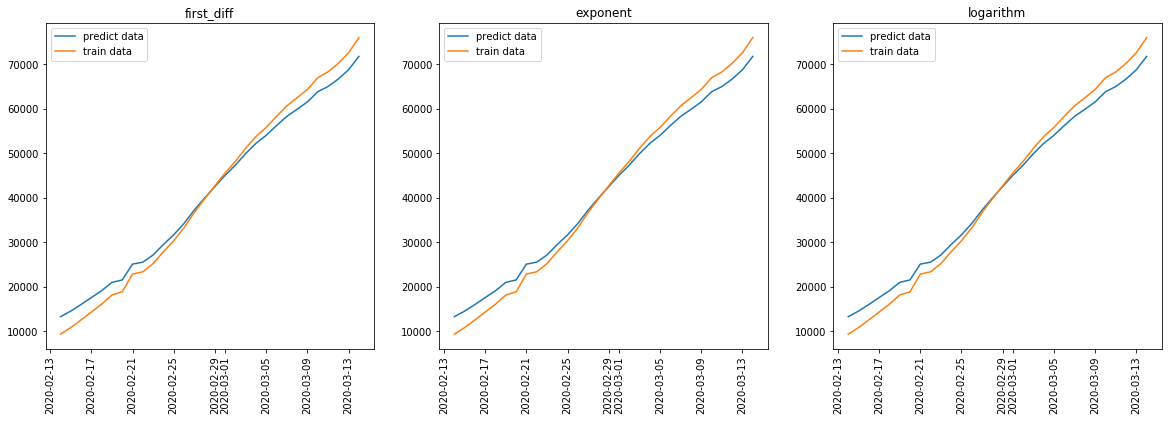

In [52]:
plt.figure(figsize = (20, 6))

#first_diff
#X_pred_fd 
plt.subplot(1,3,1)
plt.plot(x_train_history.index, X_tr_fd, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'first_diff')

#exponent 
#X_pred_exp 
plt.subplot(1,3,2)
plt.plot(x_train_history.index, X_tr_exp, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'exponent')

#logarithm
 
#X_pred_log 
plt.subplot(1,3,3)
plt.plot(x_train_history.index, X_tr_log, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'logarithm')


Text(0.5, 1.0, 'cut_features')

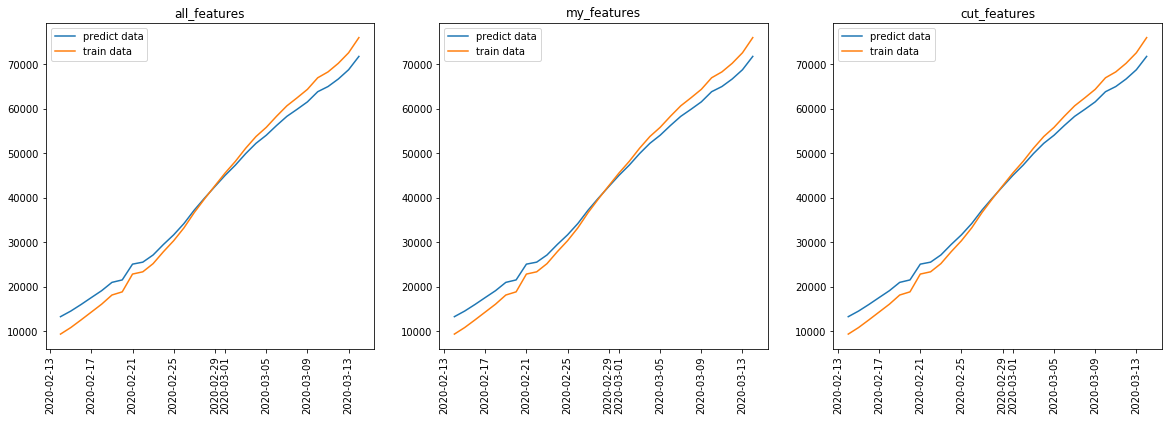

In [53]:
plt.figure(figsize = (20, 6))

#all_features 
plt.subplot(1,3,1)
plt.plot(x_train_history.index, X_tr_all, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'all_features')

#my_features
plt.subplot(1,3,2)
plt.plot(x_train_history.index, X_tr_mf, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'my_features')

#cut_features

plt.subplot(1,3,3)
plt.plot(x_train_history.index, X_tr_cutf, label='predict data' )
plt.plot(x_train_history.index, y_train, label='train data')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=90)
plt.title(f'cut_features')

Text(0.5, 1.0, 'logarithm')

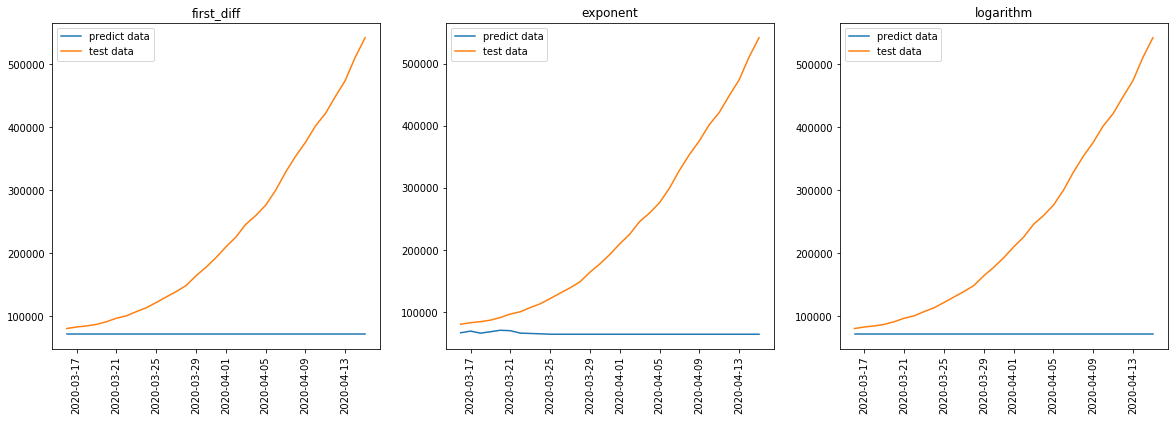

In [54]:
plt.figure(figsize = (20, 6))

#first_diff
plt.subplot(1,3,1)
plt.plot(x_test_history.index, X_pred_fd , label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.legend()
plt.xticks(rotation=90)
plt.title(f'first_diff')

#exponent 
plt.subplot(1,3,2)
plt.plot(x_test_history.index, X_pred_exp, label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.legend()
plt.xticks(rotation=90)
plt.title(f'exponent')

#logarithm
plt.subplot(1,3,3)
plt.plot(x_test_history.index, X_pred_log, label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.legend()
plt.xticks(rotation=90)
plt.title(f'logarithm')


Text(0.5, 1.0, 'cut_features')

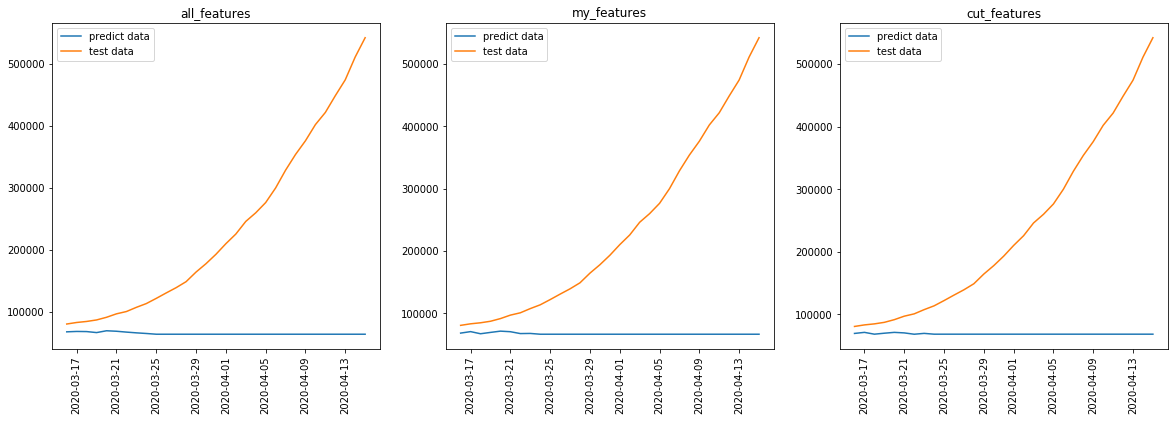

In [55]:
plt.figure(figsize = (20, 6))
#all_features 
plt.subplot(1,3,1)
plt.plot(x_test_history.index, X_pred_all, label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.legend()
plt.xticks(rotation=90)
plt.title(f'all_features')
#my_features
plt.subplot(1,3,2)
plt.plot(x_test_history.index, X_pred_mf, label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.legend()
plt.xticks(rotation=90)
plt.title(f'my_features')
#cut_features
plt.subplot(1,3,3)
plt.plot(x_test_history.index, X_pred_cutf, label='predict data' )
plt.plot(x_test_history.index, y_test, label='test data')
plt.xticks(rotation=90)
plt.legend()
plt.title(f'cut_features')

**2. Оцените ошибку модели из п.1 .**

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
mean_absolute_percentage_error(y_test, X_pred_mf)

58.658405899077174

**3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.**

**4. Попробуйте предположить характер ряда** (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени